In [ ]:
# Step 1: Install dependencies (run once)
!pip install pillow transformers torch matplotlib

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

Image: image.jpeg
Caption: a woman taking a photo with her camera


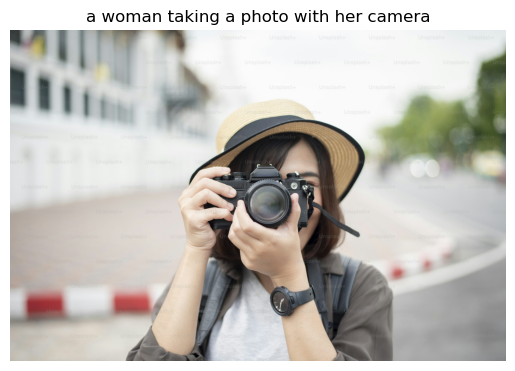

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

In [2]:
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration

def caption_image(image_path):
    processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
    model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")
    
    image = Image.open(image_path).convert('RGB')
    inputs = processor(image, return_tensors="pt")

    output = model.generate(**inputs, max_length=30)
    caption = processor.decode(output[0], skip_special_tokens=True)
    
    return caption

def main():
    image_path = "image.jpeg"
    
    try:
        caption = caption_image(image_path)
        print(f"Image: {image_path}")
        print(f"Caption: {caption}")
        
        from matplotlib import pyplot as plt
        image = Image.open(image_path)
        plt.imshow(image)
        plt.axis('off')
        plt.title(caption)
        plt.show()
        
    except Exception as e:
        print(f"Error: {e}")

if __name__ == "__main__":
    main()

In [ ]:
# Import necessary libraries
from PIL import Image  # For image loading and manipulation
from transformers import BlipProcessor, BlipForConditionalGeneration  # HuggingFace transformers for BLIP model

def caption_image(image_path):
    """
    Generates a caption for the given image using BLIP model.
    
    Args:
        image_path (str): Path to the image file
        
    Returns:
        str: Generated caption for the image
    """
    # Initialize the processor and model from pretrained BLIP base version
    # Processor handles image preprocessing and text tokenization
    processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
    # Model is the actual image captioning neural network
    model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")
    
    # Open and convert image to RGB format (ensures 3 color channels)
    image = Image.open(image_path).convert('RGB')
    
    # Preprocess the image using the BLIP processor
    # return_tensors="pt" returns PyTorch tensors
    inputs = processor(image, return_tensors="pt")

    # Generate caption with the model
    # max_length=30 limits the caption to 30 tokens (words/punctuation)
    output = model.generate(**inputs, max_length=30)
    
    # Decode the generated tokens into a readable string
    # skip_special_tokens=True removes special tokens like [CLS], [SEP] etc.
    caption = processor.decode(output[0], skip_special_tokens=True)
    
    return caption

def main():
    """Main function to demonstrate image captioning"""
    # Path to the image to be captioned (change this to your image path)
    image_path = "image.jpeg"
    
    try:
        # Get caption for the image
        caption = caption_image(image_path)
        
        # Print the results
        print(f"Image: {image_path}")
        print(f"Caption: {caption}")
        
        # Display the image with caption as title using matplotlib
        from matplotlib import pyplot as plt
        image = Image.open(image_path)
        
        # Create a plot with the image
        plt.imshow(image)
        plt.axis('off')  # Hide axes
        plt.title(caption)  # Set caption as title
        plt.show()
        
    except Exception as e:
        # Handle any errors that might occur (file not found, model loading issues, etc.)
        print(f"Error: {e}")

if __name__ == "__main__":
    # Execute the main function when script is run directly
    main()